In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

In [3]:
data = pd.read_csv('../data/training_data.csv')
data['increase_stock'] = data['increase_stock'].astype('category')
data['month'] = data['month'].astype('category')
data['day_of_week'] = data['day_of_week'].astype('category')
data = data.drop('snow', axis=1) #no information in this column
data['is_high_demand'] = data['increase_stock'].apply(lambda entity: 1 if entity == 'high_bike_demand' else 0)
data['is_high_demand'] = data['is_high_demand'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   hour_of_day     1600 non-null   int64   
 1   day_of_week     1600 non-null   category
 2   month           1600 non-null   category
 3   holiday         1600 non-null   int64   
 4   weekday         1600 non-null   int64   
 5   summertime      1600 non-null   int64   
 6   temp            1600 non-null   float64 
 7   dew             1600 non-null   float64 
 8   humidity        1600 non-null   float64 
 9   precip          1600 non-null   float64 
 10  snowdepth       1600 non-null   float64 
 11  windspeed       1600 non-null   float64 
 12  cloudcover      1600 non-null   float64 
 13  visibility      1600 non-null   float64 
 14  increase_stock  1600 non-null   category
 15  is_high_demand  1600 non-null   int64   
dtypes: category(3), float64(8), int64(5)
memory usage: 168.2 KB


In [4]:
data.describe()

,hour_of_day,holiday,weekday,summertime,temp,dew,humidity,precip,snowdepth,windspeed,cloudcover,visibility,is_high_demand
count,1600.00000,1600.000000,1600.000000,1600.00000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,11.37125,0.033125,0.710000,0.64375,15.210313,7.750750,63.927844,0.122042,0.042713,13.082500,64.322375,15.344125,0.180000
std,6.94837,0.179019,0.453904,0.47904,9.264785,10.026459,19.079419,0.920600,0.421198,7.756652,32.748869,2.323737,0.384308
min,0.00000,0.000000,0.000000,0.00000,-9.100000,-18.400000,15.850000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,5.00000,0.000000,0.000000,0.00000,7.700000,-0.800000,47.845000,0.000000,0.000000,7.500000,28.800000,16.000000,0.000000
50%,12.00000,0.000000,1.000000,1.00000,15.500000,8.300000,65.175000,0.000000,0.000000,12.300000,79.300000,16.000000,0.000000
75%,17.00000,0.000000,1.000000,1.00000,23.200000,16.800000,79.955000,0.000000,0.000000,17.600000,92.800000,16.000000,0.000000
max,23.00000,1.000000,1.000000,1.00000,35.600000,24.300000,99.890000,25.871000,6.710000,43.800000,100.000000,16.000000,1.000000


<Axes: >

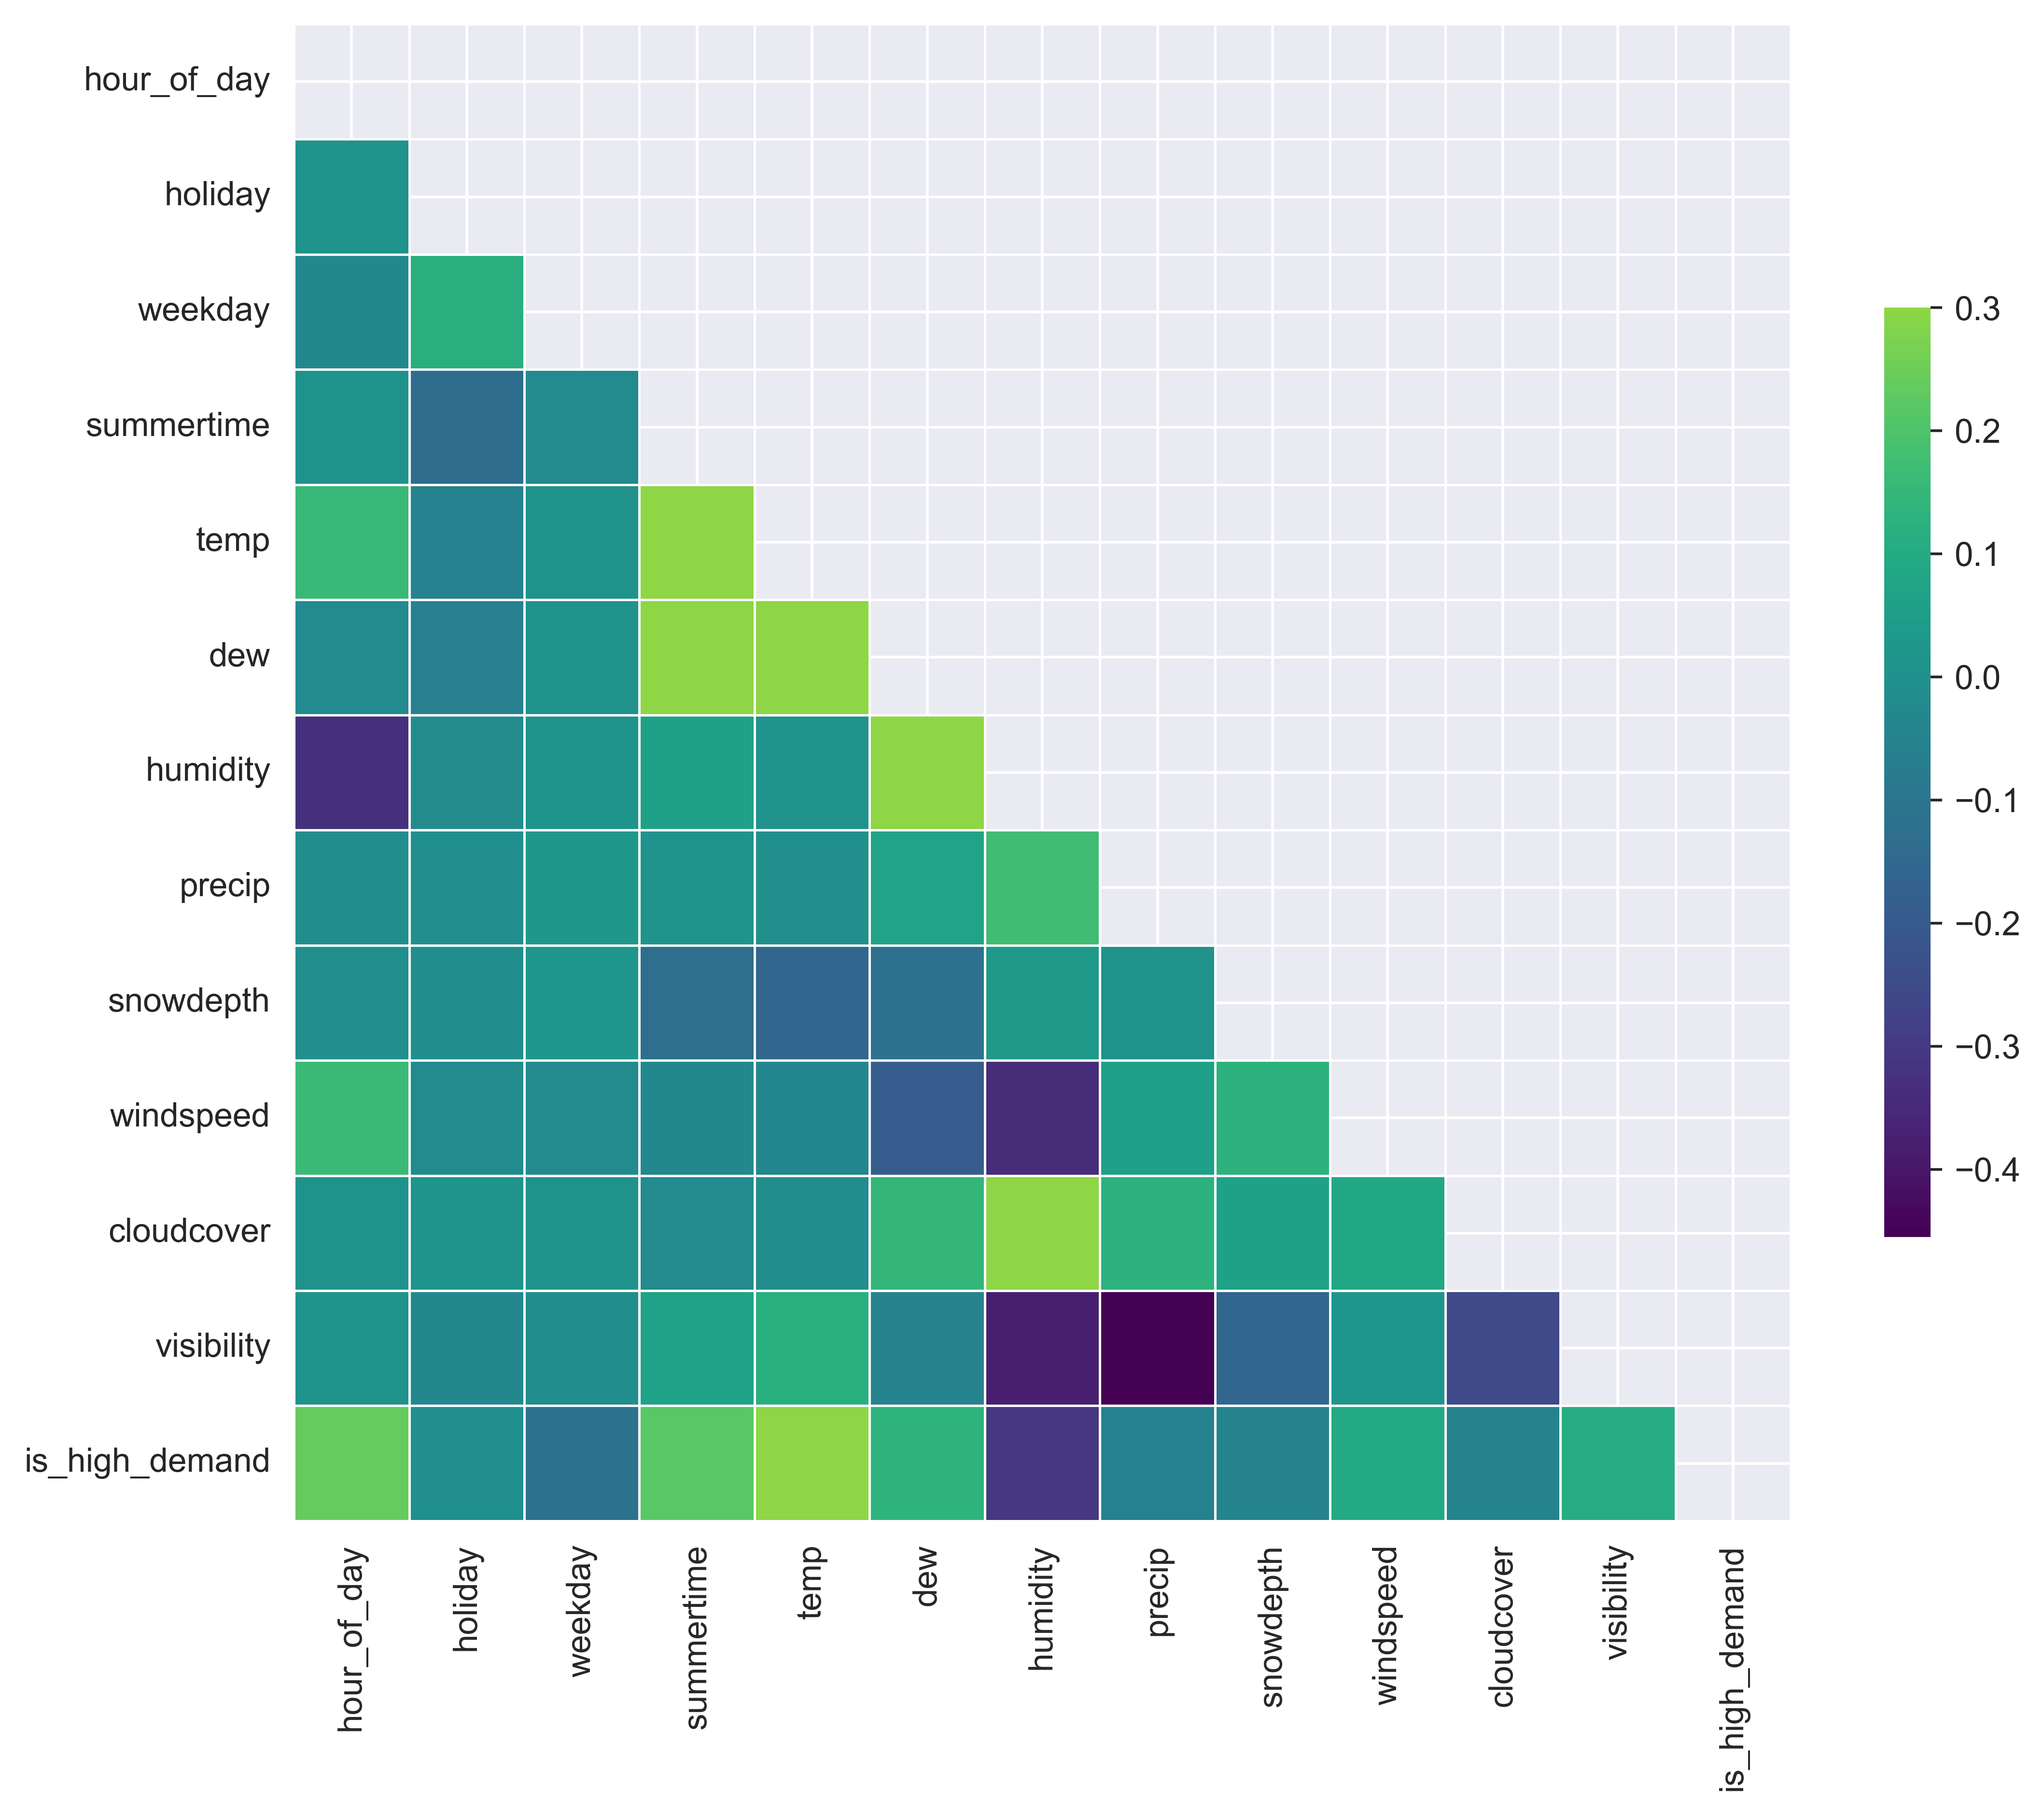

In [5]:
data.head()
data_numerical = data.select_dtypes(include='number')
corr_matrix = data_numerical.corr()

# Create a mask to only show the lower triangle of the matrix
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 10), dpi=500)

# Choose a color palette (e.g., "coolwarm", "viridis", "magma", etc.)
cmap = sns.color_palette('viridis', as_cmap=True)

# Draw the heatmap with the mask and aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
# plt.savefig('../figures/numerical_correlation_matrix.svg',format='svg', dpi=1080)

In [6]:
print(corr_matrix['is_high_demand'].sort_values())

humidity         -0.308726
weekday          -0.116446
precip           -0.059304
snowdepth        -0.047526
cloudcover       -0.045534
holiday          -0.004909
windspeed         0.096011
visibility        0.113443
dew               0.132663
summertime        0.216052
hour_of_day       0.240544
temp              0.336981
is_high_demand    1.000000
Name: is_high_demand, dtype: float64


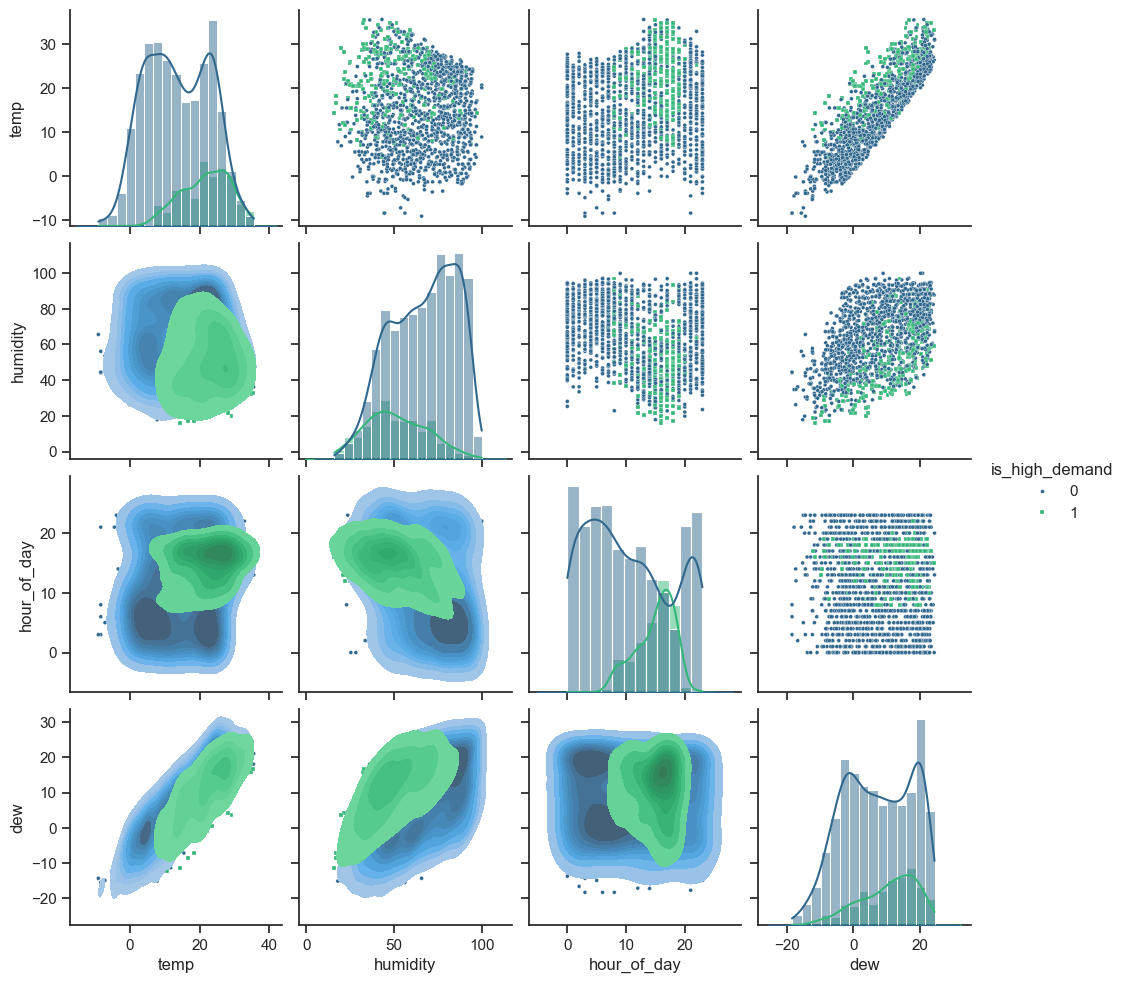

In [7]:
#show plots of all highly correlated numerical data
data_correlated_subset = data[['is_high_demand','temp','humidity','hour_of_day','dew']]
covariates = data_correlated_subset.columns[data_correlated_subset.columns != 'is_high_demand']
# Create scatter plots for every combination of covariates
sns.set(style="ticks")
pp = sns.pairplot(data_numerical, 
             vars=covariates, 
             hue='is_high_demand',
             markers=["o", "s"],
             plot_kws={"s":8},
             palette="viridis")
pp.map_lower(sns.kdeplot, fill=True)
pp.map_diag(sns.histplot, kde=True)
# plt.savefig('../figures/highly_correlated_pair_plot.svg',format='svg', dpi=800, bbox_inches='tight')

<Axes: xlabel='is_high_demand', ylabel='temp'>

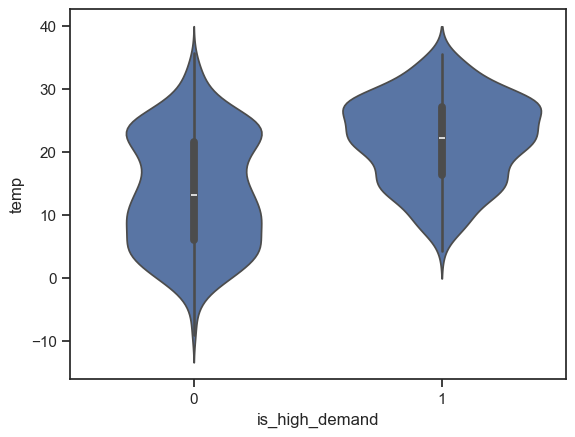

In [8]:
#visualize the distributions for across summertime (since it is binary)
data_violin = data[['is_high_demand','temp','humidity','hour_of_day','summertime','month', 'weekday']]
sns.violinplot(data=data_violin,x='is_high_demand',y='temp')

# NOTE: 
distributions look bimodal in both high and low demand distrubtions try and find if a variable can seperate those distribtions

<Axes: xlabel='is_high_demand', ylabel='temp'>

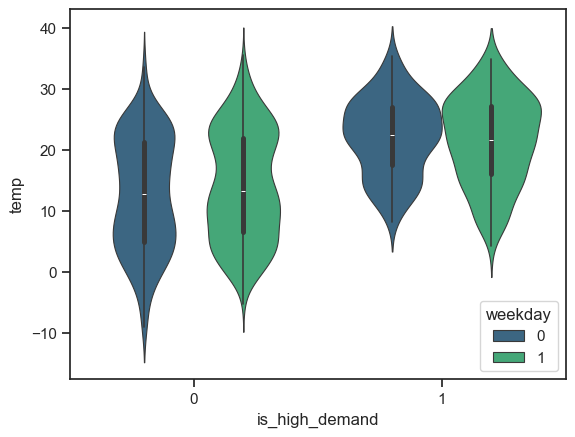

In [9]:
sns.violinplot(data=data_violin,x='is_high_demand',y='temp', hue='weekday', palette='viridis', linewidth=.8)

<Axes: xlabel='month', ylabel='temp'>

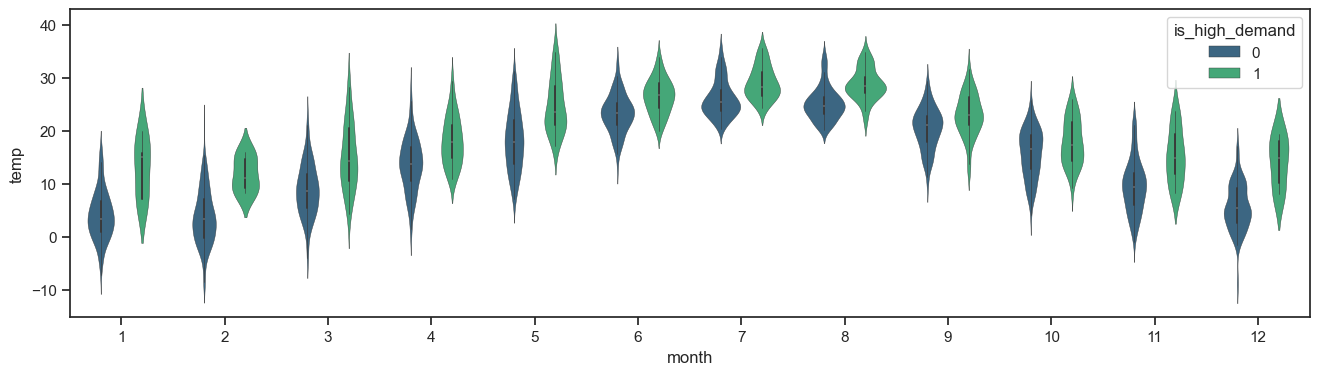

In [10]:
plt.figure(figsize=(16,4))
sns.violinplot(data=data_violin,x='month',y='temp', hue='is_high_demand', palette='viridis', linewidth=.3)
##still some bimodal looking dists but we can see that temp on month is a solid seperator of high and low demnd

<Axes: xlabel='hour_of_day', ylabel='temp'>

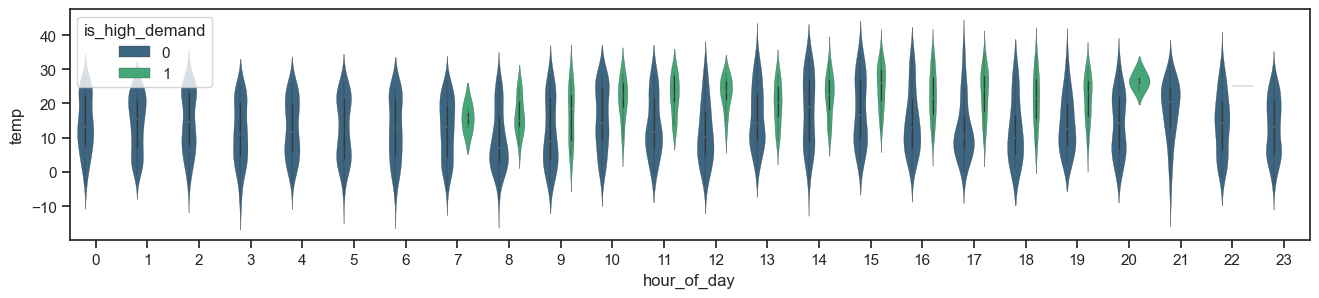

In [11]:
plt.figure(figsize=(16,3))
sns.violinplot(data=data_violin,x='hour_of_day',y='temp', hue='is_high_demand', palette='viridis', linewidth=.2)
#there is never high demand from 23-6am

array([[<Axes: title={'center': 'hour_of_day'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'weekday'}>,
        <Axes: title={'center': 'summertime'}>],
       [<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'dew'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'precip'}>],
       [<Axes: title={'center': 'snowdepth'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'cloudcover'}>,
        <Axes: title={'center': 'visibility'}>],
       [<Axes: title={'center': 'is_high_demand'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

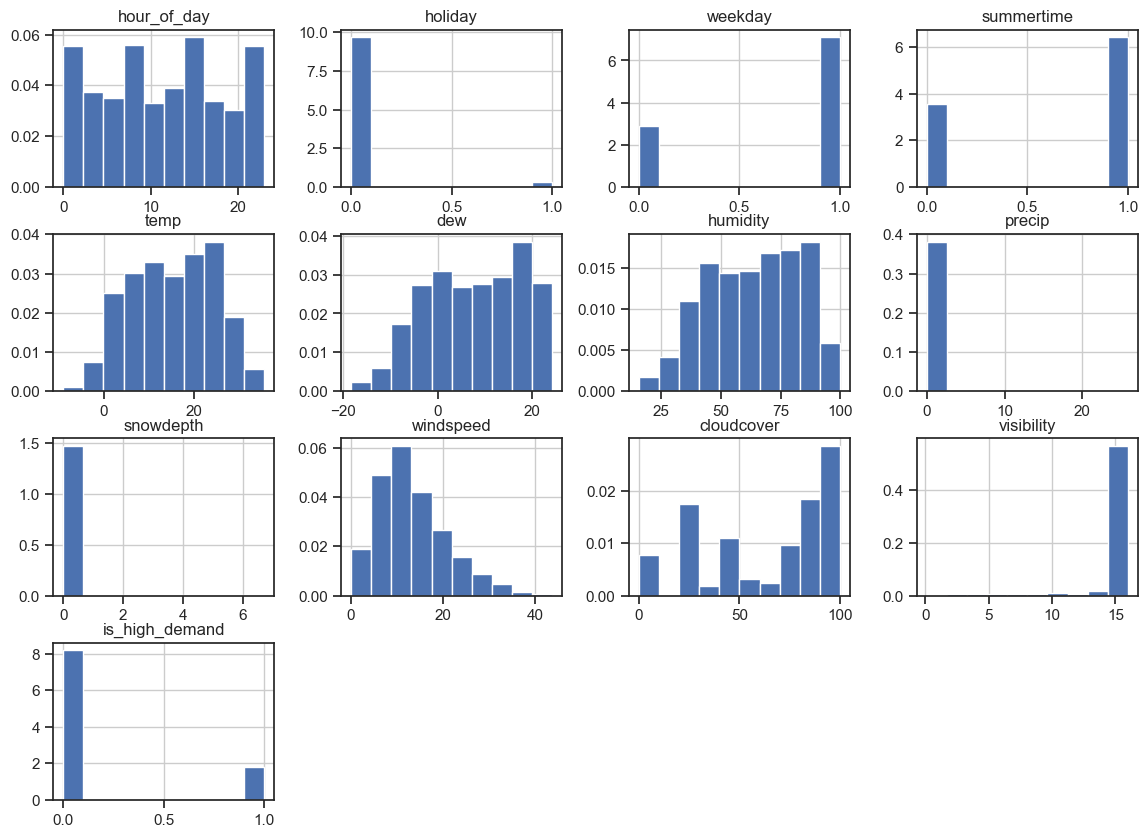

In [15]:
data.hist(figsize=(14,10), density=True)

<Axes: xlabel='precip', ylabel='Count'>

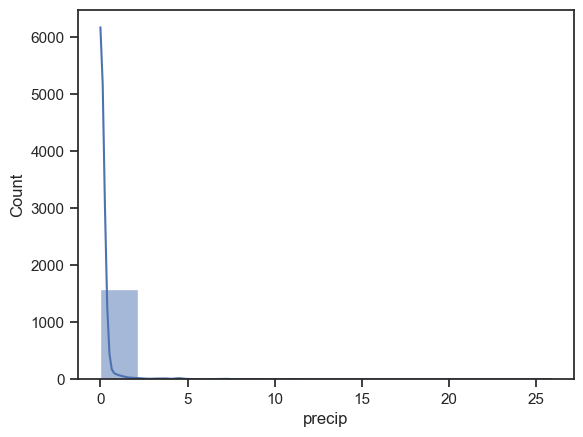

In [16]:
sns.histplot(data['precip'],kde=True)

<Axes: xlabel='visibility', ylabel='Count'>

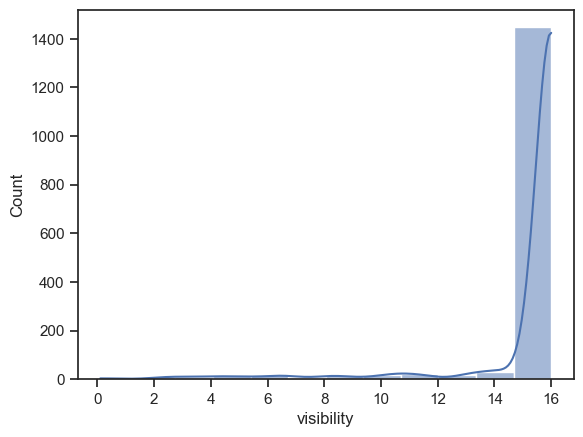

In [18]:
sns.histplot(data['visibility'],kde=True)

<Axes: xlabel='snowdepth', ylabel='Count'>

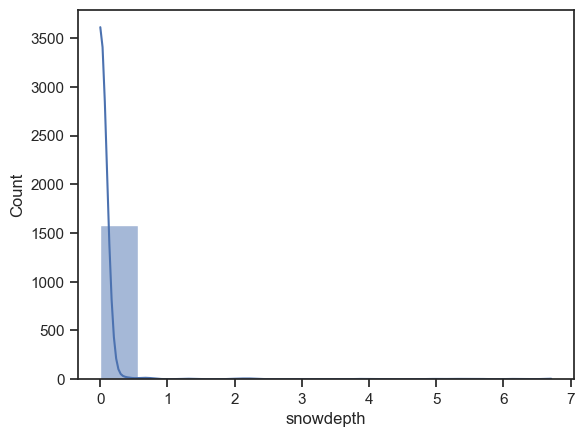

In [19]:
sns.histplot(data['snowdepth'],kde=True)

<Axes: xlabel='cloudcover', ylabel='Count'>

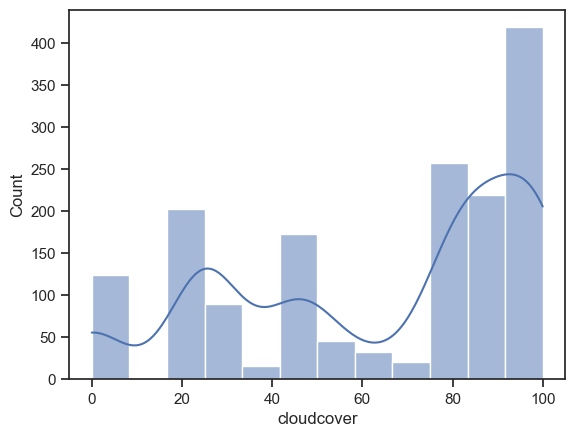

In [20]:
sns.histplot(data['cloudcover'],kde=True)

<Axes: ylabel='Frequency'>

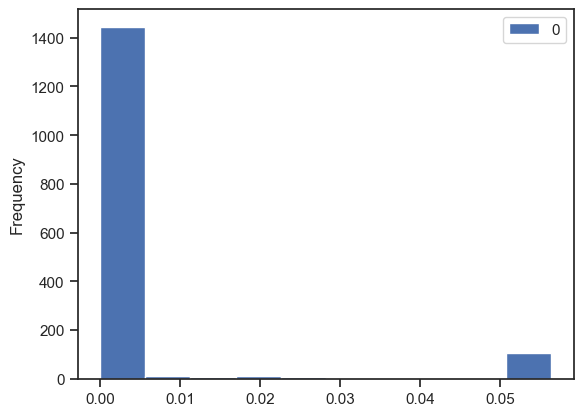